In [1]:
from google.colab import files
import zipfile

# Upload file ZIP
uploaded = files.upload()

# Ekstrak file ZIP
with zipfile.ZipFile("student_dataset original.zip", "r") as zip_ref:
    zip_ref.extractall("data")
    import os
os.listdir("data")

Saving student_dataset original.zip to student_dataset original.zip


['Students Performance Dataset.json',
 'Students_Grading_Dataset_Biased.json',
 'Students_Grading_Dataset_Biased.csv',
 'Students Performance Dataset.csv',
 'metadata.xlsx']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = "data/Students Performance Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
# Buat kolom class untuk kategori kelulusan
# Kelas 'Pass' jika Total_Score ≥ 70, 'Fail' jika < 70
df['Class'] = df['Total_Score'].apply(lambda x: 'Pass' if x >= 70 else 'Fail')

In [4]:
# Cek label unik [0, 1]
print("\nLabel unik dalam kolom Class:", df['Class'].unique())


Label unik dalam kolom Class: ['Fail' 'Pass']


In [5]:
# Statistik Deskriptif
print("Statistik Deskriptif Seluruh Data:")
print(df.describe(include='all'))

# Statistik Deskriptif Berdasarkan Kelas
print("\nStatistik Deskriptif untuk Siswa yang Pass:")
print(df[df['Class'] == 'Pass'].describe(include='all'))

print("\nStatistik Deskriptif untuk Siswa yang Fail:")
print(df[df['Class'] == 'Fail'].describe(include='all'))

Statistik Deskriptif Seluruh Data:
       Student_ID First_Name Last_Name                       Email Gender  \
count        5000       5000      5000                        5000   5000   
unique       5000          8         6                        5000      2   
top         S5999      Maria   Johnson  student4999@university.com   Male   
freq            1        657       868                           1   2551   
mean          NaN        NaN       NaN                         NaN    NaN   
std           NaN        NaN       NaN                         NaN    NaN   
min           NaN        NaN       NaN                         NaN    NaN   
25%           NaN        NaN       NaN                         NaN    NaN   
50%           NaN        NaN       NaN                         NaN    NaN   
75%           NaN        NaN       NaN                         NaN    NaN   
max           NaN        NaN       NaN                         NaN    NaN   

                Age   Department  Attend

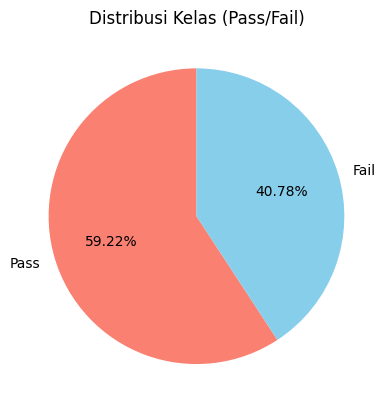

In [6]:
# Pie Chart Distribusi Pass/Fail
df["Class"].value_counts().plot.pie(
    autopct='%1.2f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title("Distribusi Kelas (Pass/Fail)")
plt.ylabel("")
plt.show()

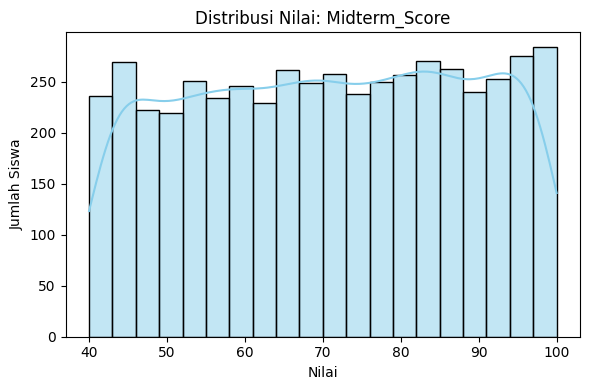

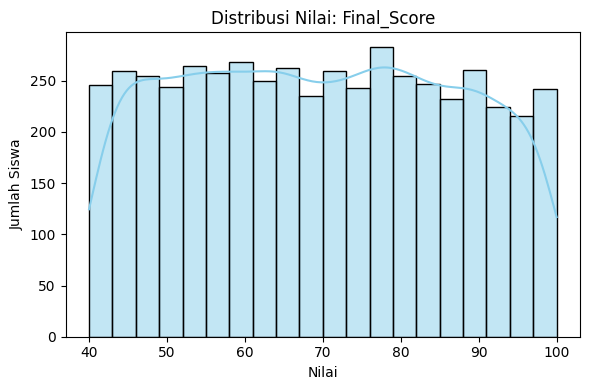

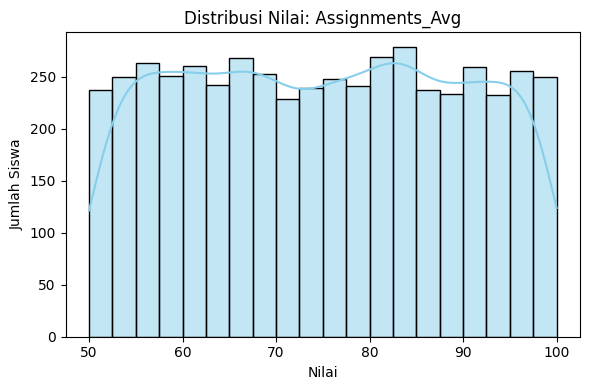

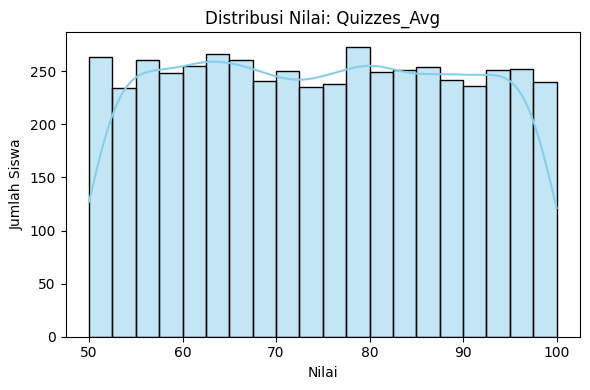

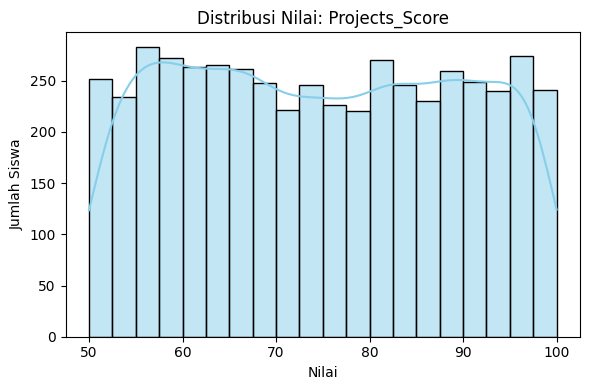

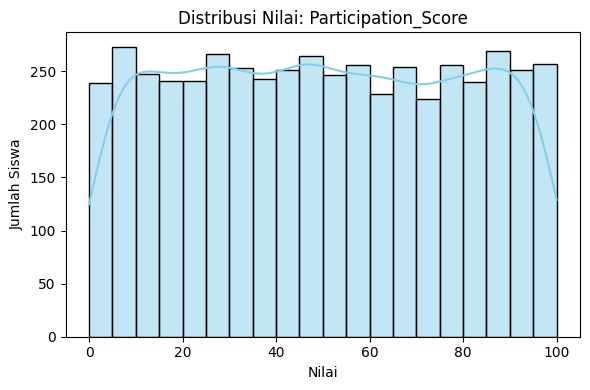

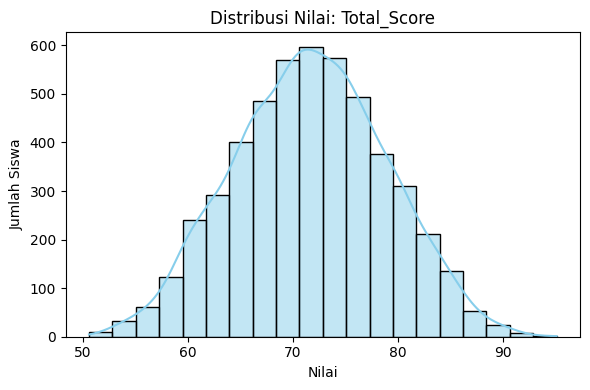

In [7]:
# Daftar kolom numerik untuk eksplorasi nilai
explore_cols = ['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Projects_Score', 'Participation_Score', 'Total_Score']

# Histogram untuk masing-masing fitur numerik
for col in explore_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi Nilai: {col}')
    plt.xlabel("Nilai")
    plt.ylabel("Jumlah Siswa")
    plt.tight_layout()
    plt.show()

In [8]:
# Korelasi antar fitur numerik
print("\nKorelasi antar Fitur Numerik:")
print(df.corr(numeric_only=True))


Korelasi antar Fitur Numerik:
                            Age  Attendance (%)  Midterm_Score  Final_Score  \
Age                    1.000000        0.015936      -0.007710    -0.003700   
Attendance (%)         0.015936        1.000000       0.007881    -0.009300   
Midterm_Score         -0.007710        0.007881       1.000000    -0.004638   
Final_Score           -0.003700       -0.009300      -0.004638     1.000000   
Assignments_Avg        0.007902       -0.003600      -0.025153     0.013635   
Quizzes_Avg            0.013998       -0.027840      -0.013974     0.004714   
Participation_Score   -0.007132        0.009051      -0.017434    -0.011764   
Projects_Score         0.006628       -0.011101      -0.024138    -0.006563   
Total_Score            0.002746       -0.014165       0.330636     0.588608   
Study_Hours_per_Week  -0.002313        0.011200       0.009096     0.004645   
Stress_Level (1-10)    0.013800        0.003838       0.035220    -0.004479   
Sleep_Hours_per_Night

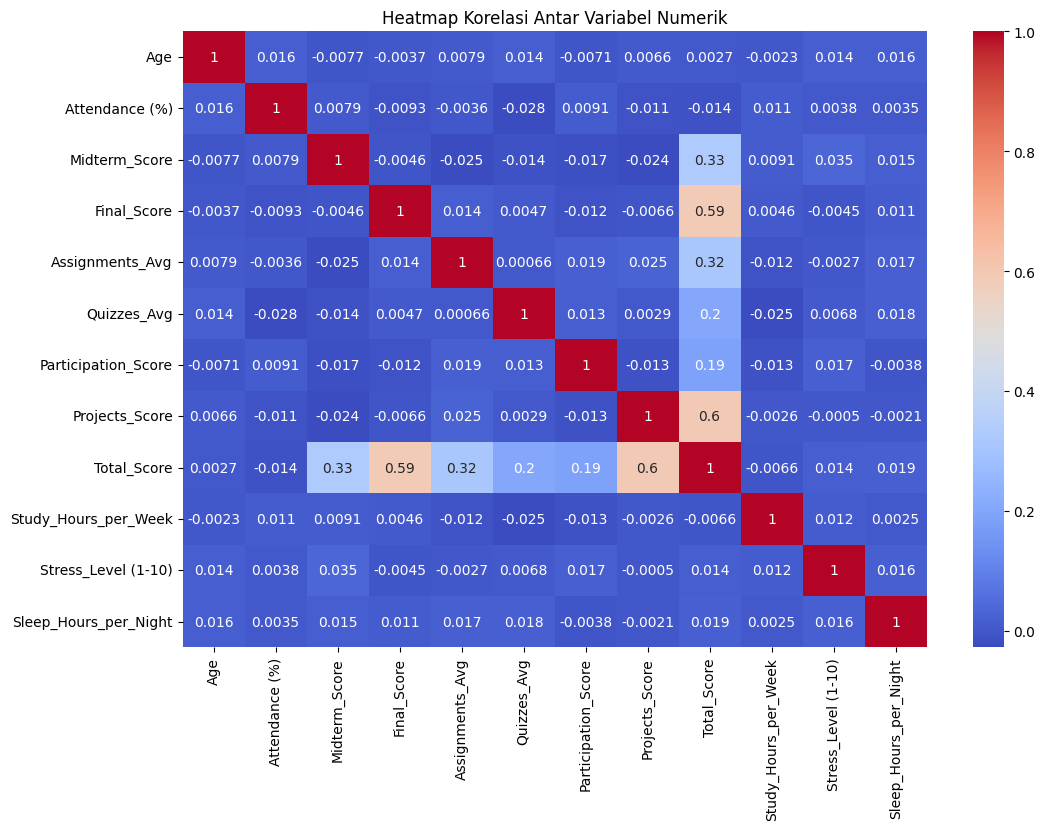

In [9]:
# Heatmap Korelasi antar Variabel Numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [10]:
# Korelasi terhadap Target (Class)
df['Class_binary'] = df['Class'].map({'Pass': 1, 'Fail': 0})
corr_target = df.corr(numeric_only=True)['Class_binary'].drop('Class_binary').sort_values(ascending=False)

print("\nKorelasi terhadap Target (Class):")
print(corr_target)


Korelasi terhadap Target (Class):
Total_Score              0.801708
Final_Score              0.481276
Projects_Score           0.473152
Assignments_Avg          0.265017
Midterm_Score            0.251470
Quizzes_Avg              0.156222
Participation_Score      0.150405
Stress_Level (1-10)      0.020894
Sleep_Hours_per_Night    0.010893
Study_Hours_per_Week     0.007204
Age                     -0.001905
Attendance (%)          -0.009264
Name: Class_binary, dtype: float64


/tmp/ipython-input-11-1612444742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='crest')


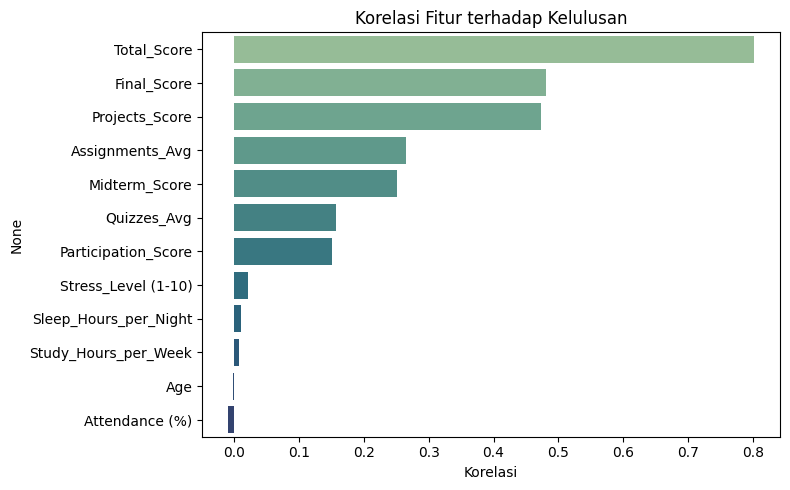

In [11]:
# Visualisasi Korelasi terhadap Class
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='crest')
plt.title("Korelasi Fitur terhadap Kelulusan")
plt.xlabel("Korelasi")
plt.tight_layout()
plt.show()

In [12]:
# Pairplot Hubungan Antar Variabel (Termasuk Class)
selected_for_pairplot = [
    'Total_Score', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
    'Assignments_Avg', 'Quizzes_Avg', 'Projects_Score',
    'Participation_Score', 'Study_Hours_per_Week',
    'Sleep_Hours_per_Night', 'Stress_Level (1-10)', 'Class'
]

sns.pairplot(df[selected_for_pairplot], hue='Class', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot: Hubungan antar Fitur terhadap Class", y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.